In [151]:
import pandas as pd
import numpy as np
from __future__ import print_function
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans
from matplotlib.pylab import plt
%matplotlib inline

In [179]:
wday = pd.read_csv("Scaled_feature_scaled_pickup.csv")

In [424]:
trial = pd.read_csv("Scaled_feature_pickup.csv")

In [425]:
trial['wd00_06'].max()

22768.0

In [271]:
wday.columns

Index([u'index', u'Unnamed: 0_x', u'BoroCT2010',
       u'Street_betweenness_centrality_avg', u'Subway_counts_daily', u'income',
       u'OfficeArea', u'ResArea', u'ComArea', u'RetailArea', u'safety',
       u'pop_density', u'employee', u'rent', u'Area_m2', u'wd00_06',
       u'wd06_10', u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800',
       u'wd1800_2100', u'wd2100_00', u'sn00_02', u'sn02_14', u'sn14_16',
       u'sn16_00', u'total', u'Unnamed: 0_y', u'BoroName',
       u'result_12am-6am_wday', u'result_6am-10am_wday',
       u'result_10am-3.30pm_wday', u'result_3.30pm-4.30pm_wday',
       u'result_4:30pm-6pm_wday', u'result_6pm-9pm_wday',
       u'result_9pm-12am_wday', u'result_12am-2am_wend',
       u'result_2am-2pm_wend', u'result_2pm-4pm_wend',
       u'result_4pm-12am_wend'],
      dtype='object')

In [272]:
wday['realtrip']= wday['Area_m2']*wday['wd00_06']

In [273]:
wday['realtrip'].max()

22768.000000020264

In [181]:
len(wday)

2068

In [182]:
wday.isnull().any()

Unnamed: 0                           False
BoroCT2010                           False
Street_betweenness_centrality_avg    False
Subway_counts_daily                  False
income                               False
OfficeArea                           False
ResArea                              False
ComArea                              False
RetailArea                           False
safety                               False
pop_density                          False
employee                             False
rent                                 False
Area_m2                              False
wd00_06                               True
wd06_10                               True
wd10_1530                             True
wd1530_wd1630                         True
wd1630_1800                           True
wd1800_2100                           True
wd2100_00                             True
sn00_02                               True
sn02_14                               True
sn14_16    

In [8]:
wday.columns

Index([u'Unnamed: 0', u'BoroCT2010', u'BoroName', u'geometry', u'Area_m2',
       u'income', u'OfficeArea', u'ResArea', u'ComArea', u'RetailArea',
       u'safety', u'pop', u'employee', u'rent',
       u'Street_betweenness_centrality_avg', u'Subway_counts_daily',
       u'wd00_06', u'wd06_10', u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800',
       u'wd1800_2100', u'wd2100_00', u'sn00_02', u'sn02_14', u'sn14_16',
       u'sn16_00', u'total'],
      dtype='object')

In [183]:
nopickup = pd.read_csv("PhaseI_Labels_all.csv")

In [184]:
nopickup.head(5)

,Unnamed: 0,BoroCT2010,BoroName,result_12am-6am_wday,result_6am-10am_wday,result_10am-3.30pm_wday,result_3.30pm-4.30pm_wday,result_4:30pm-6pm_wday,result_6pm-9pm_wday,result_9pm-12am_wday,result_12am-2am_wend,result_2am-2pm_wend,result_2pm-4pm_wend,result_4pm-12am_wend
0,0,5000900,Staten Island,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered
1,1,5012500,Staten Island,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered
2,2,5013301,Staten Island,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered,Not_Considered
3,3,5019700,Staten Island,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value,no_pickup_value
4,4,5002002,Staten Island,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet


In [185]:
wday = wday.merge(nopickup, on= "BoroCT2010", how = "inner")

In [186]:
wday.columns

Index([u'Unnamed: 0_x', u'BoroCT2010', u'Street_betweenness_centrality_avg',
       u'Subway_counts_daily', u'income', u'OfficeArea', u'ResArea',
       u'ComArea', u'RetailArea', u'safety', u'pop_density', u'employee',
       u'rent', u'Area_m2', u'wd00_06', u'wd06_10', u'wd10_1530',
       u'wd1530_wd1630', u'wd1630_1800', u'wd1800_2100', u'wd2100_00',
       u'sn00_02', u'sn02_14', u'sn14_16', u'sn16_00', u'total',
       u'Unnamed: 0_y', u'BoroName', u'result_12am-6am_wday',
       u'result_6am-10am_wday', u'result_10am-3.30pm_wday',
       u'result_3.30pm-4.30pm_wday', u'result_4:30pm-6pm_wday',
       u'result_6pm-9pm_wday', u'result_9pm-12am_wday',
       u'result_12am-2am_wend', u'result_2am-2pm_wend', u'result_2pm-4pm_wend',
       u'result_4pm-12am_wend'],
      dtype='object')

In [187]:
#wday['result_10am-3.30pm_wday']
wday = wday[(wday['result_12am-6am_wday']!='no_pickup_value')]

In [188]:
wday.isnull().any()

Unnamed: 0_x                         False
BoroCT2010                           False
Street_betweenness_centrality_avg    False
Subway_counts_daily                  False
income                               False
OfficeArea                           False
ResArea                              False
ComArea                              False
RetailArea                           False
safety                               False
pop_density                          False
employee                             False
rent                                 False
Area_m2                              False
wd00_06                              False
wd06_10                              False
wd10_1530                            False
wd1530_wd1630                        False
wd1630_1800                          False
wd1800_2100                          False
wd2100_00                            False
sn00_02                              False
sn02_14                              False
sn14_16    

In [361]:
""""
wday = wday[(wday['result_6am-10am_wday']!='no_pickup_value')|(wday['result_12am-6am_wday']!='no_pickup_value')|\
            (wday['result_10am-3.30pm_wday']!='no_pickup_value')|(wday['result_3.30pm-4.30pm_wday']!='no_pickup_value')|\
            (wday['result_4:30pm-6pm_wday']!='no_pickup_value')|(wday['result_6pm-9pm_wday']!='no_pickup_value')|\
           (wday['result_9pm-12am_wday']!='no_pickup_value')|(wday['result_12am-2am_wend']!='no_pickup_value')|(wday['result_2am-2pm_wend']!='no_pickup_value')|\
            (wday['result_2pm-4pm_wend']!='no_pickup_value')|(wday['result_4pm-12am_wend']!='no_pickup_value')]

In [189]:
wday.shape

(2035, 39)

In [190]:
wday.reset_index(inplace = True)

In [191]:
wday.columns
wday_count = wday[['wd00_06', 'wd06_10','wd10_1530','wd1530_wd1630',
      'wd1630_1800','wd1800_2100', 'wd2100_00','result_12am-6am_wday', 'result_6am-10am_wday',
       'result_10am-3.30pm_wday', 'result_3.30pm-4.30pm_wday',
      'result_4:30pm-6pm_wday', 'result_6pm-9pm_wday',
       'result_9pm-12am_wday', 'result_12am-2am_wend',
      'result_2am-2pm_wend','result_2pm-4pm_wend',
      'result_4pm-12am_wend','BoroCT2010', 'total']]

In [192]:
#wday_count.shape
wday.columns

Index([u'index', u'Unnamed: 0_x', u'BoroCT2010',
       u'Street_betweenness_centrality_avg', u'Subway_counts_daily', u'income',
       u'OfficeArea', u'ResArea', u'ComArea', u'RetailArea', u'safety',
       u'pop_density', u'employee', u'rent', u'Area_m2', u'wd00_06',
       u'wd06_10', u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800',
       u'wd1800_2100', u'wd2100_00', u'sn00_02', u'sn02_14', u'sn14_16',
       u'sn16_00', u'total', u'Unnamed: 0_y', u'BoroName',
       u'result_12am-6am_wday', u'result_6am-10am_wday',
       u'result_10am-3.30pm_wday', u'result_3.30pm-4.30pm_wday',
       u'result_4:30pm-6pm_wday', u'result_6pm-9pm_wday',
       u'result_9pm-12am_wday', u'result_12am-2am_wend',
       u'result_2am-2pm_wend', u'result_2pm-4pm_wend',
       u'result_4pm-12am_wend'],
      dtype='object')

In [166]:
wday = wday.fillna(0)

In [193]:
y_wday_1 = wday['wd00_06']
X_wday = wday[['income', 'OfficeArea', 'ResArea', 'ComArea',
       'RetailArea','safety', 'pop_density', 'employee', 'rent',
       'Street_betweenness_centrality_avg', 'Subway_counts_daily']]

In [195]:
X_train_wday, X_test_wday, y_train_wday_1, y_test_wday_1 = train_test_split(X_wday,
                           y_wday_1, test_size = 0.3, random_state =999)

In [196]:
regressor = RandomForestRegressor()
gr = GridSearchCV(regressor, param_grid={'max_depth': range(1,22)})
rf_gr = gr.fit(X_train_wday, y_train_wday_1)
print (rf_gr.best_params_)

{'max_depth': 20}


In [197]:
rf_gr.score(X_test_wday, y_test_wday_1)

0.51933345959932309

In [198]:
forest = regressor.fit(X_train_wday, y_train_wday_1)
pred_y = regressor.predict(X_test_wday)


In [199]:
len(pred_y)

611

In [200]:
w = []
w = y_test_wday_1

In [201]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [202]:
print("Feature ranking:")
for f in range(X_wday.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_wday.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature OfficeArea (0.221504)
2. feature RetailArea (0.178338)
3. feature employee (0.157402)
4. feature rent (0.156412)
5. feature safety (0.079850)
6. feature pop_density (0.076894)
7. feature ResArea (0.031852)
8. feature Street_betweenness_centrality_avg (0.031498)
9. feature Subway_counts_daily (0.023417)
10. feature ComArea (0.022398)
11. feature income (0.020434)


In [203]:
rf = pd.DataFrame()

In [205]:
l = []
o = []

In [206]:
for f in range(X_wday.shape[1]):
    l.append(X_wday.columns[indices[f]])
    o.append(importances[indices[f]])

In [207]:
len(l)

11

In [208]:
de = pd.DataFrame(columns = {"f", "i"})

In [209]:
de.f = l
de.i = o

In [210]:
len(de)

11

In [212]:
rf = X_wday


In [213]:
len(rf)

2035

In [214]:
p = rf.columns.tolist()
p 

['income',
 'OfficeArea',
 'ResArea',
 'ComArea',
 'RetailArea',
 'safety',
 'pop_density',
 'employee',
 'rent',
 'Street_betweenness_centrality_avg',
 'Subway_counts_daily']

In [216]:

for j  in range(0, 10):
    for i in range (len(de.f)):
       # print(p[j], j)
        #print(de.f[i], i)
        if p[j] == de.f[i]:
            print(p[j])
            #print(de.i[i])
            print(rf.iloc[:, j])
            rf.iloc[:, j] = rf.iloc[:, j]*(de.i[i])
            print(de.i[i])
            print(rf.iloc[:, j])
            


income
0       0.111174
1       0.155221
2       0.158716
3       0.072328
4       0.239090
5       0.156522
6       0.148639
7       0.088663
8       0.112231
9       0.188785
10      0.040309
11      0.092076
12      0.106136
13      0.008696
14      0.029175
15      0.153677
16      0.038927
17      0.170987
18      0.219504
19      0.166680
20      0.132304
21      0.055912
22      0.097684
23      0.119464
24      0.142056
25      0.158391
26      0.065177
27      0.113369
28      0.139618
29      0.069890
          ...   
2005    0.195368
2006    0.048842
2007    0.187566
2008    0.160666
2009    0.141731
2010    0.177895
2011    0.150020
2012    0.176270
2013    0.151483
2014    0.122471
2015    0.221211
2016    0.103941
2017    0.078911
2018    0.076717
2019    0.165461
2020    0.117107
2021    0.100203
2022    0.236652
2023    0.121495
2024    0.155303
2025    0.092564
2026    0.048842
2027    0.078748
2028    0.210077
2029    0.188704
2030    0.147501
2031    0.156684
2032   

0       0.127332
1       0.069455
2       0.126957
3       0.017712
4       0.257810
5       0.529376
6       0.458800
7       0.434345
8       0.338774
9       0.156640
10      0.111967
11      0.290929
12      0.300856
13      0.013432
14      0.233946
15      0.346456
16      0.143237
17      0.399522
18      0.178928
19      0.295001
20      0.208734
21      0.139632
22      0.308634
23      0.586190
24      0.578855
25      0.135219
26      0.132656
27      0.560004
28      0.361039
29      0.199831
          ...   
2005    0.022020
2006    0.051174
2007    0.081885
2008    0.056950
2009    0.071014
2010    0.012813
2011    0.065372
2012    0.034187
2013    0.047692
2014    0.074847
2015    0.012712
2016    0.080259
2017    0.072977
2018    0.064982
2019    0.056066
2020    0.014668
2021    0.040204
2022    0.047757
2023    0.091071
2024    0.123910
2025    0.086101
2026    0.004488
2027    0.003260
2028    0.041407
2029    0.051688
2030    0.080587
2031    0.077364
2032    0.0854

In [223]:
rf1 = rf[['safety', 'OfficeArea','RetailArea','employee', 'rent' ]]



Index([u'safety', u'OfficeArea', u'RetailArea', u'employee', u'rent'], dtype='object')

In [224]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

X=rf1
range_n_clusters = [2, 3,4,  5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.775973036681
For n_clusters =3, the average silhouette_score is :0.454949433587
For n_clusters =4, the average silhouette_score is :0.34432032828
For n_clusters =5, the average silhouette_score is :0.321386934527
For n_clusters =6, the average silhouette_score is :0.327243302554
For n_clusters =7, the average silhouette_score is :0.285426082241
For n_clusters =8, the average silhouette_score is :0.301128114574
For n_clusters =12, the average silhouette_score is :0.263969357595
For n_clusters =13, the average silhouette_score is :0.27632025381
For n_clusters =14, the average silhouette_score is :0.278291480634
For n_clusters =15, the average silhouette_score is :0.277475818061
For n_clusters =16, the average silhouette_score is :0.262225892618
For n_clusters =17, the average silhouette_score is :0.265868847854
For n_clusters =18, the average silhouette_score is :0.260232474476
For n_clusters =19, the average silhouette_score is :0.26

In [227]:
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

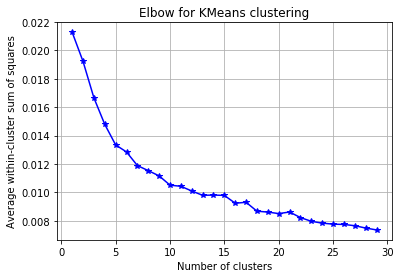

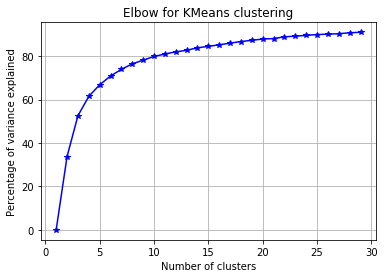

In [228]:
elbow(X, range(1,30))

In [230]:


n=7 # number of clusters
dd=rf1
#rf1[['rent','OfficeArea', 'ResArea', 'employee', 'income']] #data
#tar=y# real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[1 0 4 ..., 4 4 0]


In [231]:
rf1.columns

Index([u'safety', u'OfficeArea', u'RetailArea', u'employee', u'rent'], dtype='object')

In [232]:
len(res.labels_)

2035

In [233]:
cluster_labels = res.labels_

In [234]:
rf1['kmeans_day']= cluster_labels

C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [235]:
len(rf1['kmeans_day'].unique())

7

In [236]:
rf1['BoroCT2010'] = wday['BoroCT2010'].astype(float)

C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [69]:
rf1.head(1)

,safety,OfficeArea,RetailArea,employee,rent,kmeans_day,BoroCT2010
0,0.000073,0.000976,-0.006289,-0.002046,-0.003577,6,5000900.0


In [237]:
clusterwd00_06 = rf1

In [238]:
len(clusterwd00_06)

2035

In [239]:
clusterwd00_06.head(2)

,safety,OfficeArea,RetailArea,employee,rent,kmeans_day,BoroCT2010
0,0.053512,0.000017,0.00083,0.000044,0.05428,1,2000200.0
1,0.043750,0.000673,0.00096,0.000227,0.05863,0,2000400.0


In [240]:
#clusterwd00_06['count'] = wday['wd00_06']

In [241]:
clusterwd00_06.kmeans_day.unique()

array([1, 0, 4, 5, 3, 6, 2], dtype=int64)

In [242]:
len(clusterwd00_06)

2035

In [243]:
clusterwd00_06.to_csv("clusterwd00_06_scaled.csv")
#clusterwd00_06_ = clusterwd00_06.merge(ct1, on = "BoroCT2010", how = "inner")

In [79]:
#demand = pd.read_csv("Unmet_Demand_Labels.csv")
#demand = demand.merge(ct1, on = "BoroCT2010", how = "inner")

In [80]:
rf1 = clusterwd00_06
rf1.columns

Index([u'safety', u'OfficeArea', u'RetailArea', u'employee', u'rent',
       u'kmeans_day', u'BoroCT2010'],
      dtype='object')

In [82]:
#demand= demand.merge(nopickup, on= "BoroCT2010", how = "outer")
rf1.columns

Index([u'safety', u'OfficeArea', u'RetailArea', u'employee', u'rent',
       u'kmeans_day', u'BoroCT2010', u'Shape_Area'],
      dtype='object')

In [244]:
#demand.head(5)
rf1.columns
rf1 = rf1.merge(wday_count, on = "BoroCT2010", how = "inner")
rf1.columns

Index([u'safety', u'OfficeArea', u'RetailArea', u'employee', u'rent',
       u'kmeans_day', u'BoroCT2010', u'wd00_06', u'wd06_10', u'wd10_1530',
       u'wd1530_wd1630', u'wd1630_1800', u'wd1800_2100', u'wd2100_00',
       u'result_12am-6am_wday', u'result_6am-10am_wday',
       u'result_10am-3.30pm_wday', u'result_3.30pm-4.30pm_wday',
       u'result_4:30pm-6pm_wday', u'result_6pm-9pm_wday',
       u'result_9pm-12am_wday', u'result_12am-2am_wend',
       u'result_2am-2pm_wend', u'result_2pm-4pm_wend', u'result_4pm-12am_wend',
       u'total'],
      dtype='object')

In [111]:
#demand = demand.loc[demand['wd06_10']!='no_pickup']
#rf1['total']
wday.columns

Index([u'index', u'Unnamed: 0_x', u'BoroCT2010', u'BoroName_x', u'geometry',
       u'Area_m2', u'income', u'OfficeArea', u'ResArea', u'ComArea',
       u'RetailArea', u'safety', u'pop', u'employee', u'rent',
       u'Street_betweenness_centrality_avg', u'Subway_counts_daily',
       u'wd00_06', u'wd06_10', u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800',
       u'wd1800_2100', u'wd2100_00', u'sn00_02', u'sn02_14', u'sn14_16',
       u'sn16_00', u'total', u'Unnamed: 0_y', u'BoroName_y',
       u'result_12am-6am_wday', u'result_6am-10am_wday',
       u'result_10am-3.30pm_wday', u'result_3.30pm-4.30pm_wday',
       u'result_4:30pm-6pm_wday', u'result_6pm-9pm_wday',
       u'result_9pm-12am_wday', u'result_12am-2am_wend',
       u'result_2am-2pm_wend', u'result_2pm-4pm_wend',
       u'result_4pm-12am_wend'],
      dtype='object')

In [4]:

'''
wday[['Area_m2', 'income', 'OfficeArea', 'ResArea', 'ComArea',
       'RetailArea','safety', 'pop', 'employee', 'rent',
       'Street_betweenness_centrality_avg', 'Subway_counts_daily']]
       
'''

"\nwday[['Area_m2', 'income', 'OfficeArea', 'ResArea', 'ComArea',\n       'RetailArea','safety', 'pop', 'employee', 'rent',\n       'Street_betweenness_centrality_avg', 'Subway_counts_daily']]\n       \n"

In [315]:
satisfied = rf1[rf1['result_12am-6am_wday']=='Not_Considered']

In [317]:
satisfied = satisfied.reset_index()

In [318]:
satisfied.columns

Index([u'level_0', u'index', u'safety', u'OfficeArea', u'RetailArea',
       u'employee', u'rent', u'kmeans_day', u'BoroCT2010', u'wd00_06',
       u'wd06_10', u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800',
       u'wd1800_2100', u'wd2100_00', u'result_12am-6am_wday',
       u'result_6am-10am_wday', u'result_10am-3.30pm_wday',
       u'result_3.30pm-4.30pm_wday', u'result_4:30pm-6pm_wday',
       u'result_6pm-9pm_wday', u'result_9pm-12am_wday',
       u'result_12am-2am_wend', u'result_2am-2pm_wend', u'result_2pm-4pm_wend',
       u'result_4pm-12am_wend', u'total'],
      dtype='object')

In [322]:
satisfied['result_12am-6am_wday'].unique()

array(['Not_Considered'], dtype=object)

In [100]:
satisfied.columns

Index([u'safety', u'OfficeArea', u'RetailArea', u'employee', u'rent',
       u'kmeans_day', u'BoroCT2010', u'Shape_Area', u'wd00_06', u'wd06_10',
       u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800', u'wd1800_2100',
       u'wd2100_00', u'result_12am-6am_wday', u'result_6am-10am_wday',
       u'result_10am-3.30pm_wday', u'result_3.30pm-4.30pm_wday',
       u'result_4:30pm-6pm_wday', u'result_6pm-9pm_wday',
       u'result_9pm-12am_wday', u'result_12am-2am_wend',
       u'result_2am-2pm_wend', u'result_2pm-4pm_wend', u'result_4pm-12am_wend',
       u'total'],
      dtype='object')

In [411]:
mc = satisfied.groupby('kmeans_day')['wd00_06'].median()
mc

kmeans_day
0    0.000109
1    0.000108
2    0.044989
3    0.014573
4    0.000287
5    0.000129
6    0.041980
Name: wd00_06, dtype: float64

In [324]:
ms = satisfied.groupby('kmeans_day')['wd00_06'].std()
ms

kmeans_day
0    0.004385
1    0.006918
2    0.029162
3    0.028787
4    0.009596
5    0.011625
6    0.027511
Name: wd00_06, dtype: float64

In [325]:
satisfied.columns
satisfied_x = satisfied[[ 'OfficeArea', 'RetailArea','safety',  'employee', 'rent']]
satisfied_y = satisfied[['wd00_06']]

In [351]:
#satisfied['realtrip'] = satisfied[['wd00_06']]*satisfied['wd00_06']

In [352]:
demanded = wday[wday['result_12am-6am_wday']!='Not_Considered']
demanded =demanded.reset_index()
demanded_x = demanded[['OfficeArea', 'RetailArea','safety',  'employee', 'rent']]

In [353]:
forest = regressor.fit(satisfied_x, satisfied_y)
pred_y = regressor.predict(demanded_x)


C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [354]:
len(pred_y)

325

In [355]:
demanded['pred_00_06'] = pred_y

In [356]:
demanded['pred_00_06'].describe()

count    325.000000
mean       0.043479
std        0.030464
min        0.003175
25%        0.010091
50%        0.044772
75%        0.068892
max        0.106394
Name: pred_00_06, dtype: float64

In [357]:
demanded['realpred_00_06'] = demanded['pred_00_06'] *demanded['Area_m2']

In [358]:
demanded['realpred_00_06'].describe()

count       325.000000
mean      14363.976428
std       23402.258576
min         315.072635
25%        2555.653447
50%        8798.888547
75%       14542.349422
max      214239.165872
Name: realpred_00_06, dtype: float64

In [359]:
demanded['tripdemanded_00_06'] = demanded['pred_00_06'] - demanded['wd00_06']

In [360]:
demanded['realwd00_06'] = demanded['wd00_06']*demanded['Area_m2']

In [361]:
demanded['realwd00_06'].describe()

count    325.000000
mean       9.516923
std       24.668866
min        0.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      314.000000
Name: realwd00_06, dtype: float64

In [286]:
len(demanded)

325

In [362]:
demanded['tripdemanded_00_06'].min()

0.0031689814862433897

In [363]:
demanded['realdemand']= demanded['tripdemanded_00_06']*demanded['Area_m2']

In [364]:
demanded['realdemand'].describe()

count       325.000000
mean      14354.459504
std       23403.906431
min         301.072635
25%        2553.653447
50%        8754.888547
75%       14521.349422
max      214235.165872
Name: realdemand, dtype: float64

In [412]:
demanded = demanded[['BoroCT2010',u'wd00_06',
       u'wd06_10', u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800',
       u'wd1800_2100', u'wd2100_00', u'sn00_02', u'sn02_14', u'sn14_16',
       u'sn16_00', u'total', u'Unnamed: 0_y', u'BoroName',
       u'result_12am-6am_wday', u'result_6am-10am_wday',
       u'result_10am-3.30pm_wday', u'result_3.30pm-4.30pm_wday',
       u'result_4:30pm-6pm_wday', u'result_6pm-9pm_wday',
       u'result_9pm-12am_wday', u'result_12am-2am_wend',
       u'result_2am-2pm_wend', u'result_2pm-4pm_wend', u'result_4pm-12am_wend',
       u'tripdemanded_00_06', u'realdemand', u'pred_00_06', u'realwd00_06',
       u'realpred_00_06' ]]

,BoroCT2010,wd00_06,wd06_10,wd10_1530,wd1530_wd1630,wd1630_1800,wd1800_2100,wd2100_00,sn00_02,sn02_14,...,result_9pm-12am_wday,result_12am-2am_wend,result_2am-2pm_wend,result_2pm-4pm_wend,result_4pm-12am_wend,tripdemanded_00_06,realdemand,pred_00_06,realwd00_06,realpred_00_06
0,2000200,4.261356e-06,1.065339e-05,8.522712e-06,4.261356e-06,6.392034e-06,2.130678e-06,4.261356e-06,2.130678e-06,4.261356e-06,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.011022,5173.137124,0.011027,2.0,5175.137124
1,2027402,1.873079e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.873079e-06,5.619237e-06,0.000000e+00,0.000000e+00,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.042171,22514.259085,0.042173,1.0,22515.259085
2,2029301,4.021351e-06,8.042702e-06,4.021351e-06,0.000000e+00,0.000000e+00,8.042702e-06,1.206405e-05,0.000000e+00,0.000000e+00,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.006604,1642.302040,0.006608,1.0,1643.302040
3,2029302,2.069565e-05,4.139129e-05,6.208694e-05,1.839613e-05,1.149758e-05,3.449275e-05,2.069565e-05,4.599033e-06,3.679226e-05,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.056061,24379.559700,0.056082,9.0,24388.559700
4,2029500,5.484442e-05,3.206289e-04,2.320341e-04,6.328202e-05,4.640682e-05,7.593843e-05,6.750082e-05,4.218802e-06,3.796921e-05,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.066087,15664.805753,0.066142,13.0,15677.805753
5,2029700,3.876944e-05,5.600031e-05,6.030803e-05,2.584630e-05,2.153858e-05,3.446173e-05,4.307716e-05,0.000000e+00,1.723086e-05,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.057651,13383.170027,0.057690,9.0,13392.170027
6,2030701,1.509750e-05,4.277625e-05,2.264625e-05,5.032500e-06,7.548750e-06,2.516250e-05,1.258125e-05,0.000000e+00,5.032500e-06,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.005137,2041.439484,0.005152,6.0,2047.439484
7,2030900,1.571353e-06,3.142706e-06,3.142706e-06,1.571353e-06,0.000000e+00,7.856765e-07,7.856765e-07,0.000000e+00,7.856765e-07,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.006607,8408.960697,0.006608,2.0,8410.960697
8,2031000,1.259997e-05,1.102498e-05,1.417497e-05,1.574997e-06,4.724990e-06,0.000000e+00,7.874984e-06,1.574997e-06,0.000000e+00,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.068767,43661.958915,0.068780,8.0,43669.958915
9,2031800,0.000000e+00,1.682359e-05,5.607864e-06,0.000000e+00,0.000000e+00,5.607864e-06,0.000000e+00,0.000000e+00,0.000000e+00,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.005347,953.486394,0.005347,0.0,953.486394


In [384]:
unmet = pd.merge(rf1[['BoroCT2010', 'kmeans_day']], demanded[['BoroCT2010',u'wd00_06',
       u'wd06_10', u'wd10_1530', u'wd1530_wd1630', u'wd1630_1800',
       u'wd1800_2100', u'wd2100_00', u'sn00_02', u'sn02_14', u'sn14_16',
       u'sn16_00', u'total', u'Unnamed: 0_y', u'BoroName',
       u'result_12am-6am_wday', u'result_6am-10am_wday',
       u'result_10am-3.30pm_wday', u'result_3.30pm-4.30pm_wday',
       u'result_4:30pm-6pm_wday', u'result_6pm-9pm_wday',
       u'result_9pm-12am_wday', u'result_12am-2am_wend',
       u'result_2am-2pm_wend', u'result_2pm-4pm_wend', u'result_4pm-12am_wend',
       u'tripdemanded_00_06', u'realdemand', u'pred_00_06', u'realwd00_06',
       u'realpred_00_06', 'Area_m2' ]], how= 'inner', on='BoroCT2010')

In [385]:
unmet.shape

(325, 33)

In [391]:
unmet.head(1)

,BoroCT2010,kmeans_day,wd00_06,wd06_10,wd10_1530,wd1530_wd1630,wd1630_1800,wd1800_2100,wd2100_00,sn00_02,...,result_12am-2am_wend,result_2am-2pm_wend,result_2pm-4pm_wend,result_4pm-12am_wend,tripdemanded_00_06,realdemand,pred_00_06,realwd00_06,realpred_00_06,Area_m2
0,2.0002e+06,1,0.000004,0.000011,0.000009,0.000004,0.000006,0.000002,0.000004,0.000002,...,Demand_Unmet,Demand_Unmet,Demand_Unmet,Demand_Unmet,0.011022,5173.137124,0.011027,2.0,5175.137124,469334.165452


In [393]:
#unmet.head(1)
l = len(unmet)
l

325

In [394]:

#unmet['count'].replace(0,0.00001, inplace=True)

In [413]:
unmet['number of demanded'] = range(0, l, 1)
unmet['below std demanded'] = range(0, l, 1)
unmet['above std demanded'] = range(0, l, 1)

In [416]:
unmet['number of demanded'] = unmet['number of demanded'].astype(float)

In [417]:
for j in range(len(unmet)):
    for i in range(0, n):
        #print(m[i])
        if unmet['kmeans_day'][j] == i :
            unmet['number of demanded'][j] =  mc[i]-unmet['wd00_06'][j]  
            #unmet['below std demanded'][j]= unmet['number of demanded'][j]- s[i]
            #unmet['above std demanded'][j] = unmet['number of demanded'][j]+s[i]
  

C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [421]:
unmet['number of demanded'].describe()

count    325.000000
mean       0.000642
std        0.002848
min       -0.001759
25%        0.000076
50%        0.000100
75%        0.000115
max        0.014573
Name: number of demanded, dtype: float64

In [422]:
unmet['realcountfromclustering']= unmet['number of demanded']*unmet['Area_m2']

In [423]:
unmet['realcountfromclustering'].describe()

count      325.000000
mean       446.107440
std       2994.781626
min       -295.808966
25%         12.217462
50%         18.396357
75%         40.346912
max      41807.766240
Name: realcountfromclustering, dtype: float64

In [576]:
unmet['number of demanded'][0] = unmet['below std demanded'][0]
unmet['number of demanded'][122] = unmet['below std demanded'][122]
unmet['number of demanded'][144] = unmet['below std demanded'][144]

C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [575]:
unmet['number of demanded'][0]

125

In [578]:
unmet = unmet[["BoroCT2010","kmeans_day", "number of demanded" , "below std demanded", "above std demanded"]]

In [579]:
unmet.to_csv("unmet_wday6-10.csv")

In [92]:
from sklearn.mixture import GaussianMixture

In [97]:
range_n_clusters = range(2,12)
for n_clusters in range_n_clusters:
    gm = GaussianMixture(n_components=n_clusters, random_state=999)
    X=dd
    gm.fit(X)
    cluster_labels = gm.predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.569052537142
For n_clusters =3, the average silhouette_score is :0.446828700026
For n_clusters =4, the average silhouette_score is :0.403063434933
For n_clusters =5, the average silhouette_score is :0.415997986365
For n_clusters =6, the average silhouette_score is :0.121543841861
For n_clusters =7, the average silhouette_score is :0.201723592828
For n_clusters =8, the average silhouette_score is :0.204480421311
For n_clusters =9, the average silhouette_score is :0.131306758808
For n_clusters =10, the average silhouette_score is :0.101228017558
For n_clusters =11, the average silhouette_score is :0.0693925232003


In [101]:
gm = GaussianMixture(n_components=7, random_state=2017)
gm.fit(dd)
cluster_labels = gm.predict(X)
rf1['gaussian_day'] = cluster_labels

C:\Users\pf910\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [102]:
rf1['gaussian_day'].unique()

array([3, 0, 1, 4, 2, 5, 6], dtype=int64)